In [1]:
# bears of 3 types detective model

#bing image search

#key1 8c52912c73ae4f069ef9d6429a6ff6dd
#key2 9ec435fc010a480b95d1080d629a1c3e
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
#hide
from fastbook import *
from fastai.vision.widgets import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 27.2 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:

key = os.environ.get('AZURE_SEARCH_KEY', '8c52912c73ae4f069ef9d6429a6ff6dd')

In [3]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [4]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('content_url')
len(ims)

150

In [5]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

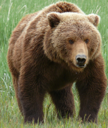

In [6]:
dest = 'images/grizzly.jpg'
download_url(ims[0],dest)
im = Image.open(dest)
im.to_thumb(128,128)

In [7]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key , f'{o} bear')
    download_images(dest, urls = results.attrgot('contentUrl'))


In [8]:
fns = get_image_files(path)
fns

(#432) [Path('bears/black/628c059a-1192-4c45-9459-2ef1b4b74b3d.jpg'),Path('bears/black/480a0a33-ba67-4b79-b8e5-db86e8c13a0d.jpg'),Path('bears/black/464e7284-2ed2-4072-9a88-659d7ef24714.jpg'),Path('bears/black/f6b53931-1e3e-4fb9-bf18-e1b4f34c0c24.jpg'),Path('bears/black/2368cbd3-a40f-44bb-baa9-5439595ff303.jpg'),Path('bears/black/c8f2d5cf-3631-4ff0-a024-3f81cee7016f.jpeg'),Path('bears/black/fbf845c7-3c39-49c1-836c-0ba2100065cc.jpg'),Path('bears/black/a7f03eef-bef8-47d0-97e5-90e31847e1cc.jpg'),Path('bears/black/eb37e9c3-b3bf-4aed-b1ba-5f8944fa4ebc.jpg'),Path('bears/black/9c77c6e9-32a8-4726-a80a-0af650fb4cec.jpg')...]

In [9]:
#파일의 오류 여부
failed  = verify_images(fns)

In [10]:
#오류파일 모든요소 제거
failed.map(Path.unlink);

In [11]:
??verify_images

In [12]:
#DataLoaders 객체 만들기
# 전달받은 여러 DataLoader 객체를 목적에 맞게 학습용과
# 검증용으로 나누어 저장하는 클래스

class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [13]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [14]:
dls = bears.dataloaders(path)

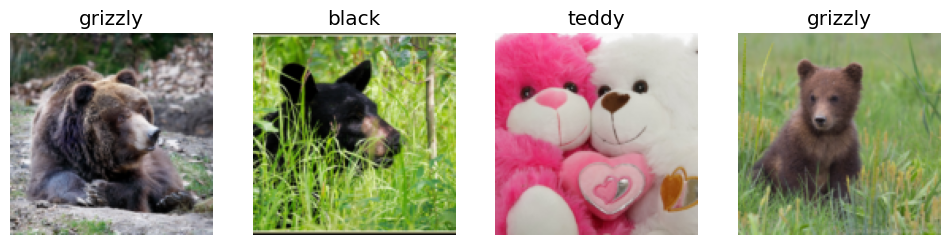

In [15]:
#show_batch 로 미리 배치중 일부 확인
dls.valid.show_batch(max_n=4, nrows=1)

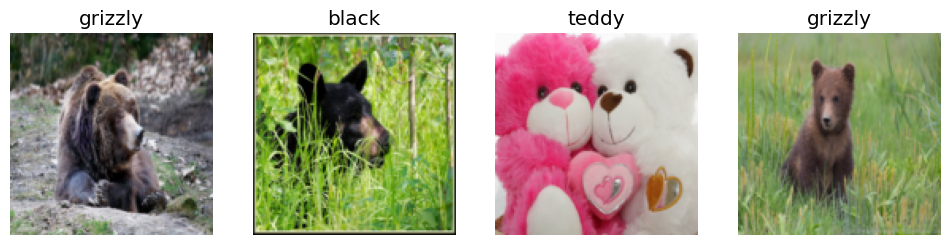

In [16]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

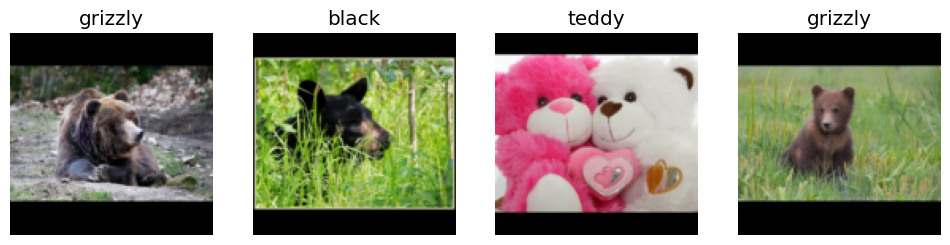

In [17]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

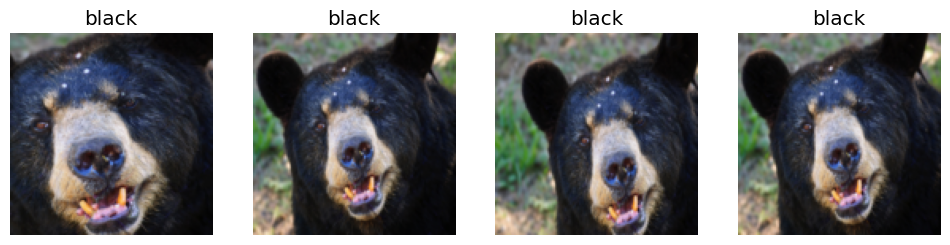

In [18]:
bears = bears.new(item_tfms= RandomResizedCrop(128, min_scale = 0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n = 4 , nrows = 1, unique = True)

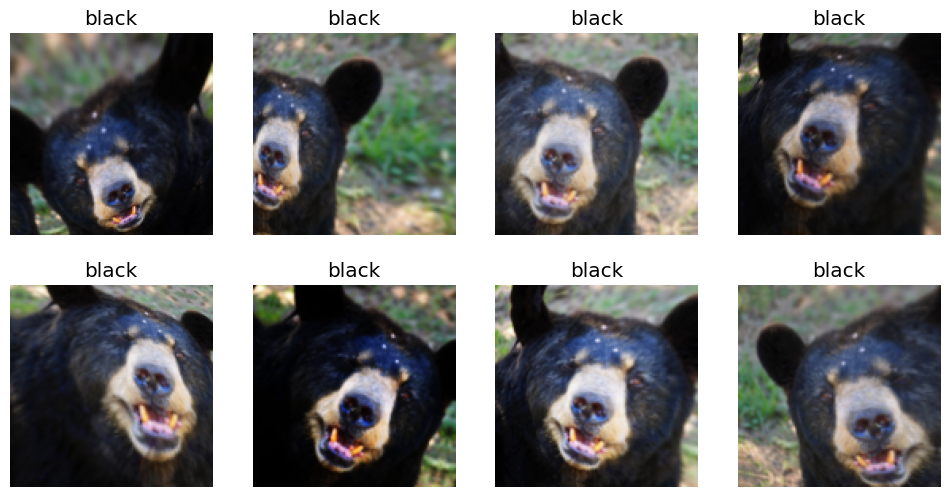

In [19]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [20]:
#모델 훈련과 혼련된 모델을 이용한 데이터 정리

bears = bears.new(item_tfms=RandomResizedCrop(224,min_scale=0.5),
                  batch_tfms= aug_transforms())
dls = bears.dataloaders(path)


In [21]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd

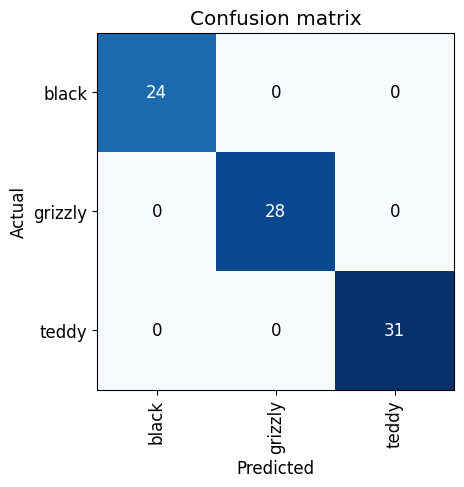

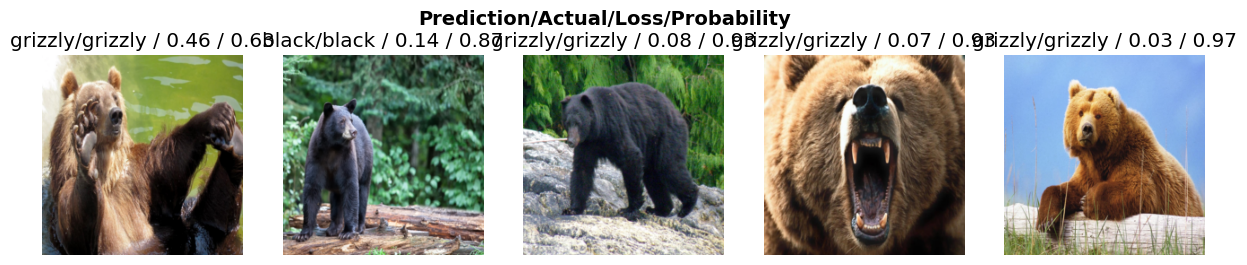

In [22]:
#오차행렬 표시
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

#가장 틀린 이미지들 표시
interp.plot_top_losses(5, nrows=1)

In [23]:
#출력된 이미지를 선택하여 삭제하거나 relabeling가능
#데이터 정리 가능한 gui

cleaner = ImageClassifierCleaner(learn)
cleaner

In [24]:
#클리너가 실제로 일하진않음 번호를 반환해줌 이걸 추가작업

for idx in cleaner.delete(): cleaner.fns[idx].unlink()



In [25]:
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [26]:
learn.export()

In [27]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [28]:
learn_inf = load_learner(path/'export.pkl')

In [29]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([1.4887e-03, 9.9846e-01, 5.1114e-05]))

In [30]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [31]:
btn_upload = widgets.FileUpload()

In [32]:
btn_upload

FileUpload(value={}, description='Upload')

In [34]:
img = PILImage.create(btn_upload.data[-1])

In [36]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [37]:
pred, pred_idx, probs = learn_inf.predict(img)

In [46]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability:{probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability:0.9953')

In [47]:
#create aplication  with ipython , voila

btn_run = widgets.Button(description = 'Classify')
btn_run


Button(description='Classify', style=ButtonStyle())

In [48]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl : display(img.to_thumb(128,128))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction:{pred}; Probability: {probs[pred_idx]}'

btn_run.on_click(on_click_classify)


In [49]:
VBox([widgets.Label('Select your bear!'), btn_upload, btn_run, out_pl, lbl_pred])

In [50]:
!pip install voila
!jupyter severextension enable voila --sys-prefix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.6/375.6 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.1
    Uninstalling pyzmq-23.2.1:
      Successfully uninstalled pyzmq-23.2.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstal

usage: jupyter
       [-h]
       [--version]
       [--config-dir]
       [--data-dir]
       [--runtime-dir]
       [--paths]
       [--json]
       [--debug]
       [subcommand]

Jupyter:
Interactive
Computing

positional arguments:
  subcommand
    the
    subcommand
    to launch

options:
  -h, --help
    show this
    help
    message and
    exit
  --version
    show the
    versions of
    core
    jupyter
    packages
    and exit
  --config-dir
    show
    Jupyter
    config dir
  --data-dir
    show
    Jupyter
    data dir
  --runtime-dir
    show
    Jupyter
    runtime dir
  --paths
    show all
    Jupyter
    paths. Add
    --json for
    machine-
    readable
    format.
  --json
    output
    paths as
    machine-
    readable
    json
  --debug
    output
    debug
    information
    about paths

Available s
ubcommands:
bundlerexte
nsion
console
dejavu
events
execute
kernel
kernelspec
migrate
nbclassic
nbconvert
nbextension
notebook
run server 
serverexten
sion t